# Homework 2

### QUESTION 1

Obtain the 200 top-ranking universities in www.topuniversities.com (ranking 2018). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the details page. Store the resulting dataset in a pandas DataFrame and answer the following questions:

Which are the best universities in term of:
    (a) ratio between faculty members and students?
    (b) ratio of international students?

Answer the previous question aggregating the data by (c) country and (d) region

In [1]:
#importing the libraries
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import numpy as np
from collections import defaultdict
from IPython.core.display import display,HTML

In [2]:
#Defining a function that will get the attribute of the universiy using the url of the page of the university

def Get_data( HTML_tag ) :
    #Using BeautifulSoup to extract the data from the given HTML
    Page_Soup = BeautifulSoup(requests.get(HTML_tag).text, 'html.parser')
    name = Page_Soup.find('h1').text
    country = Page_Soup.find('span' , class_='country').text

    #We get the number, delete the comma and then the rest of the text (there was spaces and text we had no use of)
    # get the infos : number of faculty member
    if Page_Soup.find('div', class_='total faculty') is not None:
        faculty_total = re.findall("\d+", Page_Soup.find('div', class_='total faculty').text.replace("," , ""))
        number_faculty_total = int(faculty_total[0])
    else:
        number_faculty_total = 'Unknown'
        
    # get the infos : number of international faculty member
    if Page_Soup.find('div', class_='inter faculty') is not None:
        faculty_international = re.findall("\d+", Page_Soup.find('div', class_='inter faculty').text.replace("," , ""))
        number_faculty_international = int(faculty_international[0])
    else:
        number_faculty_international = 'Unknown'
        
    # get the infos : number of students    
    if Page_Soup.find('div', class_='total student') is not None:
        students_total = re.findall("\d+", Page_Soup.find('div', class_='total student').text.replace("," , ""))
        number_students_total = int(students_total[0])
    else:
        number_students_total = 'Unknown'
    # get the infos : number of students coming from another country        
    if Page_Soup.find('div', class_ = 'total inter') is not None:
        students_international = re.findall("\d+",Page_Soup.find('div', class_ = 'total inter').text.replace("," , ""))
        number_students_international = int(students_international[0])
    else:
        number_students_international = 'Unknown'
    
    # We return the results in the form of a dataframe with all the infos
    Data = pd.DataFrame({'Name': [name], 'Country': [country], 'Total_Faculty': [number_faculty_total], 
                         'Inter_Faculty': [number_faculty_international], 'Total_Students': [number_students_total], 
                         'Inter_Students': [number_students_international],'Rank': np.nan, 'Region':np.nan})
    return Data

In [3]:
# We run a test on the function Get_data
# and display the result
Test = Get_data('https://www.topuniversities.com/universities/university-michigan#wurs')
display(Test)

,Country,Inter_Faculty,Inter_Students,Name,Rank,Region,Total_Faculty,Total_Students
0,United States,1920,7527,University of Michigan,NaN,NaN,6809,43147


All the data from the universities are not on the main page. However all the links are on the page. We will create a function to exctract all the URLs of each universitiy.

### Extracting data from topuniversities.com

In [4]:
# extract request url from jsonfile and uses them to extract other data via Get_Data()

# Used postman to request htmlfile. then searched for <tbody> it was empty so we searched for json/txt to find where
# the documents that JQuery/Ajax or whatever loads in after a while
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508507889334')
req = r.json()
data = req['data']
QSframe = pd.DataFrame.from_dict(data)
QSframe.url = "https://www.topuniversities.com" + QSframe.url

# We nw have a dataframe with all the infos for the wholle ranking
# we only keep the datas for the first 200 top school
# We also keep track of the full frame to use it in the exercice 2 to get the region for every country
QS = QSframe.head(200).copy()

# We create a new dataframe do apply our changes
QSdf = pd.DataFrame()
# Create a loop to update the Region and the rank for every School
# we use the compteur i to update the rank to avoid tie in the ranking
for i, url in enumerate(QS.url):
    data = Get_data(url)
    data['Rank'] = i+1
    data['Region']=QS.loc[i,'region']
    QSdf = QSdf.append(data)

#  We Put the final dataframe in the variable QS
QS = QSdf.copy()    
# We display the whole dataframe with all the relavants infos
print('DataFrame of the Ranking from the topuniversities.com :')
display(QS)

DataFrame of the Ranking from the topuniversities.com :


,Country,Inter_Faculty,Inter_Students,Name,Rank,Region,Total_Faculty,Total_Students
0,United States,1679,3717,Massachusetts Institute of Technology (MIT),1,North America,2982,11067
0,United States,2042,3611,Stanford University,2,North America,4285,15878
0,United States,1311,5266,Harvard University,3,North America,4350,22429
0,United States,350,647,California Institute of Technology (Caltech),4,North America,953,2255
0,United Kingdom,2278,6699,University of Cambridge,5,Europe,5490,18770
0,United Kingdom,2964,7353,University of Oxford,6,Europe,6750,19720
0,United Kingdom,2554,14854,UCL (University College London),7,Europe,6345,31080
0,United Kingdom,2071,8746,Imperial College London,8,Europe,3930,16090
0,United States,635,3379,University of Chicago,9,North America,2449,13557
0,Switzerland,1886,7563,ETH Zurich - Swiss Federal Institute of Techno...,10,Europe,2477,19815


In [5]:
#converting the columns we need to have as integers to be able to apply some operations upon them
QS.Total_Faculty = pd.to_numeric(QS.Total_Faculty, errors='coerce')
QS.Total_Students = pd.to_numeric(QS.Total_Students, errors='coerce')
QS.Inter_Faculty  = pd.to_numeric(QS.Inter_Faculty, errors='coerce')
QS.Inter_Students = pd.to_numeric(QS.Inter_Students, errors='coerce')

We define Fonctions for every Questions. We will use them again for the second dataframe acquired on another website

In [6]:
# Method resolving the Question (a). It will be use for both exercice 1 and 2
def Question_a(Ranking) :
    Ranking = Ranking.reset_index()
    # We divide the columns total_faculty by the number of students
    # Calculating the ratio between faculty members and students
    Ranking['Faculty_over_Students'] = Ranking.Total_Faculty.div(Ranking.Total_Students, axis= 0)
    Ranking = Ranking.set_index('Faculty_over_Students')
    Ranking = Ranking.sort_index(ascending=False)
    #Showing the 10 best universities in terms of Faculty members over Students Ratio
    print('10 best universities in terms of Faculty members over Students Ratio:')
    display((Ranking[['Name']].head(10)))
    #plot
    # Plotting answer to Question a
    print('Plot:')
    fac_stud_plot = Ranking.head(10).reset_index().plot(x='Name', y='Faculty_over_Students', kind='bar')
    fac_stud_plot.set_title('10 best universities in terms of Faculty members over Students Ratio:')
    fac_stud_plot.set_ylabel('Faculty members / students')
    fac_stud_plot.set_xlabel('Universities')
    plt.show(fac_stud_plot)
    return Ranking

10 best universities in terms of Faculty members over Students Ratio:


,Name
Faculty_over_Students,
0.422616,California Institute of Technology (Caltech)
0.398323,Yale University
0.342292,University of Oxford
0.292488,University of Cambridge
0.276353,Johns Hopkins University
0.269870,Stanford University
0.269450,Massachusetts Institute of Technology (MIT)
0.266604,University of Rochester
0.266437,University of Pennsylvania


Plot:


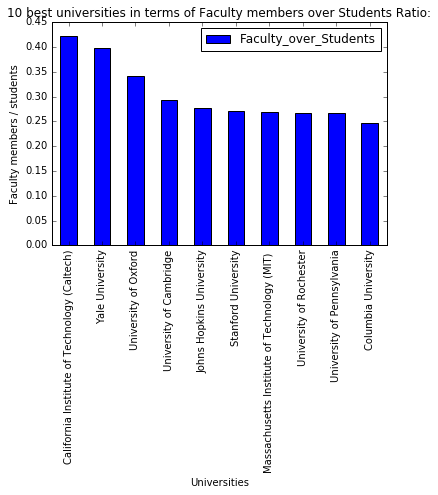

In [7]:
# Apply the function on the first dataframe
QS = Question_a(QS)

In [8]:
def Question_b(Ranking) :
    Ranking = Ranking.reset_index()
    # we calculate the  ratio of international students
    # by dividing the number of international student by the number of student
    Ranking['Inter_Students_over_Total'] = Ranking.Inter_Students.div(Ranking.Total_Students, axis= 0)
    Ranking = Ranking.set_index('Inter_Students_over_Total')
    Ranking = Ranking.sort_index(ascending=False)
    display(Ranking[['Name']].head(10))
    # Plotting answer to Question b
    print('Plot:')
    interstud_total_plot = Ranking.head(10).reset_index().plot(x='Name', y='Inter_Students_over_Total', kind='bar')
    interstud_total_plot.set_title('10 best universities in terms of International students over Total students ratio:')
    interstud_total_plot.set_ylabel(' International students / students')
    interstud_total_plot.set_xlabel('Universities')
    plt.show(interstud_total_plot)
    return Ranking

,Name
Inter_Students_over_Total,
0.691393,London School of Economics and Political Scien...
0.570047,Ecole Polytechnique Fédérale de Lausanne (EPFL)
0.543567,Imperial College London
0.502533,Maastricht University
0.478062,Carnegie Mellon University
0.477928,UCL (University College London)
0.457955,University of St Andrews
0.427434,The University of Melbourne
0.421816,Queen Mary University of London


Plot:


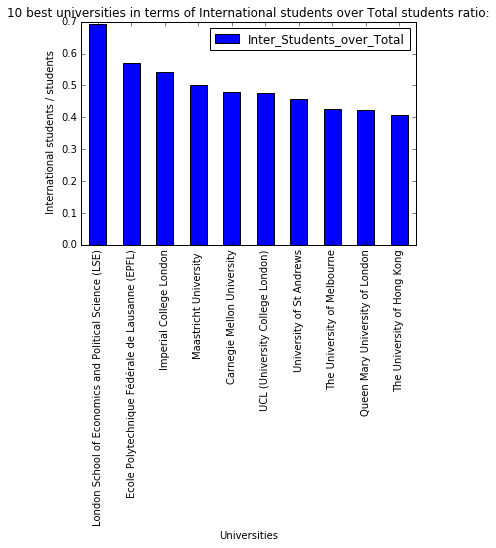

In [9]:
QS = Question_b(QS)

In order to aggregate the results by country, we will use the groupBy function.
 
 C. By Country
    1. Ratio between faculty members and students
    2. Ratio of international students
 D. By Region
    1. Ratio between faculty members and students
    2. Ratio of international students
    

In [10]:
def Region_and_Country_Stat(Ranking) :
    Ranking = Ranking.reset_index()
    C1 = pd.DataFrame(Ranking.groupby('Country').Faculty_over_Students.mean())
    C2 = pd.DataFrame(Ranking.groupby('Country').Inter_Students_over_Total.mean())

    D1 = pd.DataFrame(Ranking.groupby('Region').Faculty_over_Students.mean())
    D2 = pd.DataFrame(Ranking.groupby('Region').Inter_Students_over_Total.mean())

    C1 = C1.sort_values('Faculty_over_Students', ascending=False).head(10)
    print('Question C1')
    display(C1)
    # Plotting answer to Question C1
    print('Plot:')
    C1_plot = C1.reset_index().plot(x='Country', y='Faculty_over_Students', kind='bar')
    C1_plot.set_title('10 best countries in terms of Faculty members over Students Ratio:')
    C1_plot.set_ylabel('Faculty members / students')
    C1_plot.set_xlabel('Countries')
    plt.show(C1_plot)
    
    C2 = C2.sort_values('Inter_Students_over_Total', ascending=False).head(10)
    print('Question C2')
    display(C2)
    # Plotting answer to Question C2
    print('Plot:')
    C2_plot = C2.reset_index().plot(x='Country', y='Inter_Students_over_Total', kind='bar')
    C2_plot.set_title('10 best countries in terms of International students over Total students ratio:')
    C2_plot.set_ylabel('International students / students')
    C2_plot.set_xlabel('Countries')
    plt.show(C2_plot)
    
    D1 = D1.sort_values('Faculty_over_Students', ascending=False)
    print('Question D1')
    display(D1)
    # Plotting answer to Question D1
    print('Plot:')
    D1_plot = D1.reset_index().plot(x='Region', y='Faculty_over_Students', kind='bar')
    D1_plot.set_title('10 best regions in terms of Faculty members over Students Ratio:')
    D1_plot.set_ylabel('Faculty members / students')
    D1_plot.set_xlabel('Region')
    plt.show(D1_plot)
    
    D2 = D2.sort_values('Inter_Students_over_Total', ascending=False)
    print('Question D2')
    display(D2)
    # Plotting answer to Question D1
    print('Plot:')
    D2_plot = D2.reset_index().plot(x='Region', y='Inter_Students_over_Total', kind='bar')
    D2_plot.set_title('10 best regions in terms of International students over Total students ratio:')
    D2_plot.set_ylabel('International students / students')
    D2_plot.set_xlabel('Region')
    plt.show(D2_plot)
    return 

Question C1


,Faculty_over_Students
Country,
Russia,0.221910
Denmark,0.186580
Saudi Arabia,0.175828
Singapore,0.162279
Japan,0.155840
Malaysia,0.153893
United States,0.151151
South Korea,0.149356
France,0.144006


Plot:


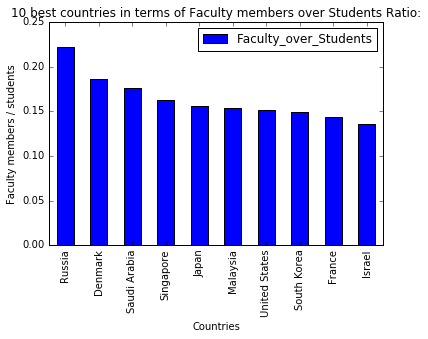

Question C2


,Inter_Students_over_Total
Country,
United Kingdom,0.351308
Australia,0.346878
Switzerland,0.313816
"Hong Kong S.A.R., China",0.312148
Austria,0.306095
Singapore,0.277091
Canada,0.252604
New Zealand,0.248971
Netherlands,0.245456


Plot:


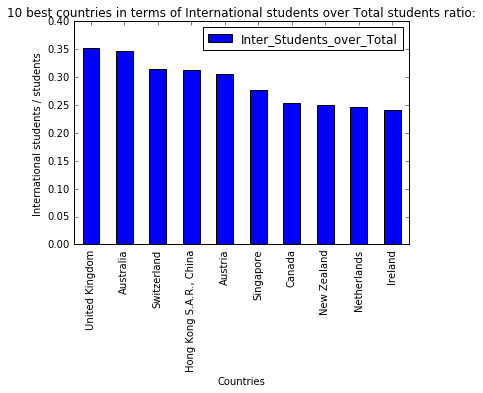

Question D1


,Faculty_over_Students
Region,
North America,0.144831
Asia,0.134673
Europe,0.120003
Latin America,0.096779
Africa,0.088450
Oceania,0.075003


Plot:


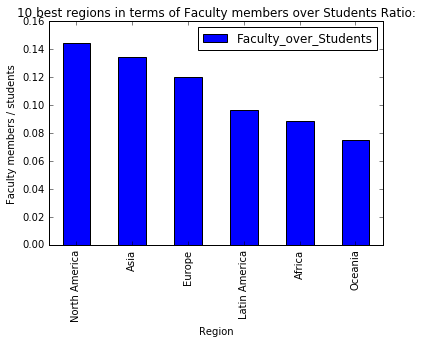

Question D2


,Inter_Students_over_Total
Region,
Oceania,0.329077
Europe,0.245932
North America,0.202437
Africa,0.169703
Asia,0.132394
Latin America,0.071751


Plot:


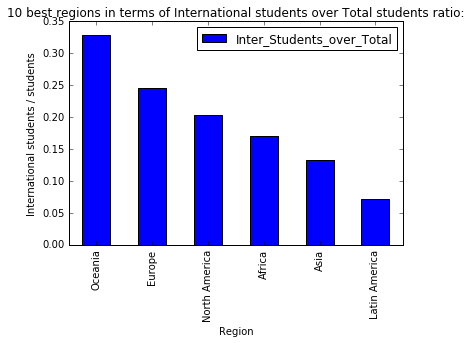

In [11]:
#display(QS)
Region_and_Country_Stat(QS)

DISCUSSION OF THE RESULTS:
    
    We observe that the universities with a high number of faculty members usually are high in the ranking. We also observe that our dear beloving school, the EPFL, is alsmost the school with the highest ratio of international Students behind the London School of Economics. Oceania is the Region with the highest ratio of international student followed by the european countries. And the United Kingdom is the country with the most highest ratio of international student The North American universities are the one with the most of faculty members.  
    
    

### QUESTION 2

    (2) Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018). Repeat the analysis of the previous point and discuss briefly what you observed.

In [12]:
# Used postman to request htmlfile. then searched for <tbody> it was empty so we searched for json/txt to find where
# the documents that JQuery/Ajax or whatever loads in after a while

r = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
req = r.json()
data = req['data']
THframe = pd.DataFrame.from_dict(data)
THframe = THframe.head(200)
# copy THframe for exercice 5
TH5 = THframe.copy()
display(TH5)

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...
5,Harvard University,United States,0,Harvard University,466,6,60,private,99.7,8,...,98.4,2,84.2,9,None,"20,326",26%,8.9,"Agriculture & Forestry,Archaeology,Art, Perfor...",/world-university-rankings/harvard-university
6,Princeton University,United States,0,Princeton University,469,7,70,private,99.6,9,...,93.9,6,85.7,7,45 : 55,"7,955",24%,8.3,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/princeton-university
7,Imperial College London,United Kingdom,0,Imperial College London,472,8,80,master_account,96.7,40,...,88.7,12,81.7,13,37 : 63,"15,857",55%,11.4,"Biological Sciences,Chemical Engineering,Chemi...",/world-university-rankings/imperial-college-lo...
8,University of Chicago,United States,0,University of Chicago,473,9,90,private,99.4,12,...,90.1,10,85.3,8,44 : 56,"13,525",25%,6.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-chicago
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,0,ETH Zurich – Swiss Federal Institute of Techno...,479,=10,100,master_account,94.3,60,...,92.0,8,76.4,21,31 : 69,"19,233",38%,14.6,"Agriculture & Forestry,Architecture,Biological...",/world-university-rankings/eth-zurich-swiss-fe...


In [13]:
#Create the three colomns total students/ International student and Total faculty member
#A bit of data cleaning. We must remove the "=" and "%" and make sure that the numbers are not strings.
# We also calculate the number of Inter_students with the poucentage 
# and the number of member faculty
THframe['Total_Students'] = pd.to_numeric(THframe.stats_number_students.str.replace(',' , ''), errors='coerce') 
THframe['Inter_Students'] = round(pd.to_numeric(THframe.stats_pc_intl_students.str.replace('%' , ''), errors='coerce').div(100) * THframe.Total_Students)
THframe['Total_Faculty'] = round(THframe.Total_Students.div(pd.to_numeric(THframe.stats_student_staff_ratio, errors='coerce')))
#change the rank to delete the Ties
THframe['Rank']= THframe.index.values+1

#Because we will apply the functions from question 1, the columns's name must be the same, thus why we need to change them.
#We also select only the meaningful datas
THframe['Country'] = THframe['location']
THframe['Name'] = THframe['name']
THframe = THframe[['Country', 'Name', 'Rank', 'Total_Students', 'Inter_Students', 'Total_Faculty']]

#We add the column Region to our data frame! We must also fill the column with the data using the DF of question 1
THframe['Region'] = 'N/A'
# Resolve N/A
# Because TH don't provide the information of region directly,
# We will merge it with QS on country so we can extract country and region data
# We need all the QS data so we dont miss any country's region
whole_QS = QSframe
whole_QS['Country']=whole_QS['country']
whole_QS['Region']=whole_QS['region']

# Manually found the three exceptions that did not match in country names.
whole_QS['Country'] = whole_QS['Country'].str.replace('Hong Kong S.A.R., China', 'Hong Kong')
whole_QS['Country'] = whole_QS['Country'].str.replace("Russia", "Russian Federation")
# QS did not have Luxembourg on its list. So easyfix, it is valid since Belarus is not in TH and we just want the region
whole_QS['Country'] = whole_QS['Country'].str.replace("Belarus", "Luxembourg")

# Then we create a dictonary with the data from QS
loc_to_reg = whole_QS[['Country', 'Region']]
loc_to_reg = set(loc_to_reg.apply(lambda x: '{}_{}'.format(x['Country'], x['Region']), axis=1).values)
loc_to_reg = {x.split('_')[0]: x.split('_')[1] for x in loc_to_reg}
loc_to_reg = defaultdict(lambda: 'N/A', loc_to_reg)
def resolve_uni(x):
    x['Region'] = (loc_to_reg[x['Country']])
    return x
THframe = THframe.apply(resolve_uni, axis=1)

# Now that the region columns is updated and clear we can 

TH = THframe.copy()
print('DataFrame of the Ranking from the timeshighereducation.com :')
display(TH)

DataFrame of the Ranking from the timeshighereducation.com :


,Country,Name,Rank,Total_Students,Inter_Students,Total_Faculty,Region
0,United Kingdom,University of Oxford,1,20409,7755.0,1822.0,Europe
1,United Kingdom,University of Cambridge,2,18389,6436.0,1687.0,Europe
2,United States,California Institute of Technology,3,2209,596.0,340.0,North America
3,United States,Stanford University,4,15845,3486.0,2113.0,North America
4,United States,Massachusetts Institute of Technology,5,11177,3800.0,1285.0,North America
5,United States,Harvard University,6,20326,5285.0,2284.0,North America
6,United States,Princeton University,7,7955,1909.0,958.0,North America
7,United Kingdom,Imperial College London,8,15857,8721.0,1391.0,Europe
8,United States,University of Chicago,9,13525,3381.0,2181.0,North America
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,10,19233,7309.0,1317.0,Europe


Answering question (a), the faculty members over students ratio:

10 best universities in terms of Faculty members over Students Ratio:


,Name
Faculty_over_Students,
0.303056,Vanderbilt University
0.243889,University of Copenhagen
0.232579,Yale University
0.232565,University of Rochester
0.232546,Johns Hopkins University
0.227291,Emory University
0.222208,Duke University
0.196141,École Polytechnique
0.192233,Scuola Normale Superiore di Pisa


Plot:


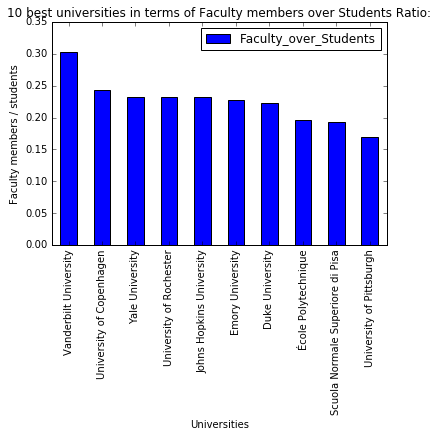

In [14]:
# We use the same fonction than for the question 1
THframe = Question_a(THframe)

Answering question (b), the international students over total ratio:

,Name
Inter_Students_over_Total,
0.709985,London School of Economics and Political Science
0.569934,University of Luxembourg
0.549978,Imperial College London
0.549960,École Polytechnique Fédérale de Lausanne
0.500030,Maastricht University
0.490001,University College London
0.479956,University of St Andrews
0.449984,Carnegie Mellon University
0.449984,Queen Mary University of London


Plot:


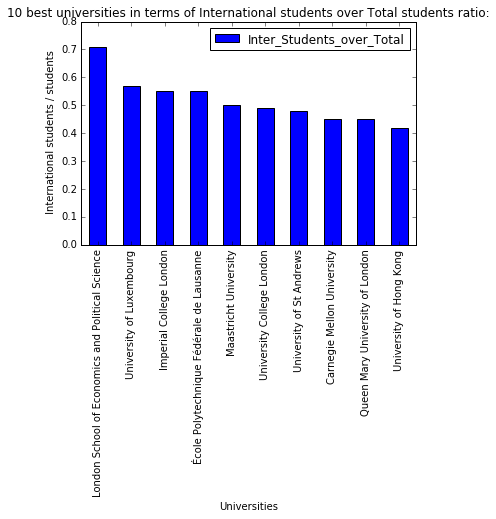

In [15]:
# We use the same fonction than for the question 1
THframe = Question_b(THframe)

Question C1


,Faculty_over_Students
Country,
Denmark,0.160176
Italy,0.138870
Russian Federation,0.136989
Japan,0.132105
United States,0.106393
France,0.099340
China,0.087419
Taiwan,0.086970
South Africa,0.085487


Plot:


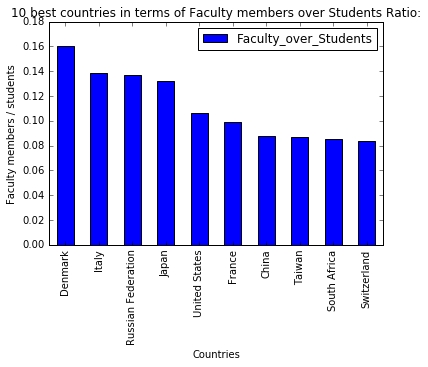

Question C2


,Inter_Students_over_Total
Country,
Luxembourg,0.569934
United Kingdom,0.365478
Hong Kong,0.327989
Switzerland,0.314280
Australia,0.307502
Singapore,0.305013
New Zealand,0.290003
Ireland,0.269976
Austria,0.260014


Plot:


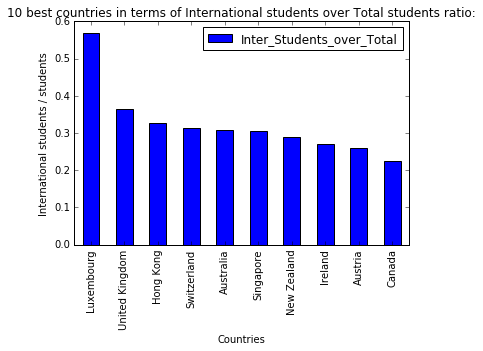

Question D1


,Faculty_over_Students
Region,
North America,0.101658
Africa,0.085487
Asia,0.080347
Europe,0.065951
Oceania,0.039893


Plot:


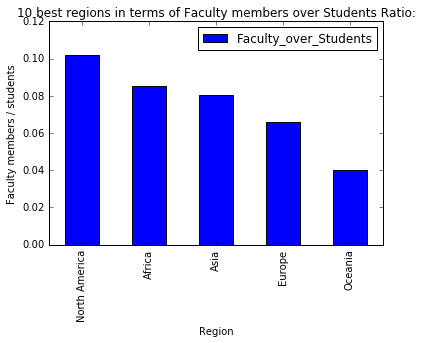

Question D2


,Inter_Students_over_Total
Region,
Oceania,0.305558
Europe,0.244658
North America,0.185585
Africa,0.180024
Asia,0.165242


Plot:


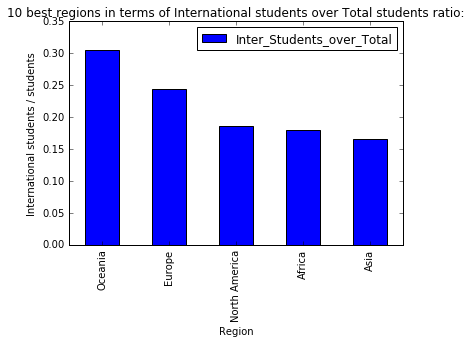

In [16]:
# We use the same fonction than for the question 1

Region_and_Country_Stat(THframe)

DISCUSSION OF THE RESULTS:
    
    Vanderbilt University is the University with the highest ratio of faculty member which is in the USA. Whereas the Danmark is the country the the highest ratio of faculty member. North America is still the region with the highest ratio of faculty member. Once again the London school of Economics has the highest ratio of international student far above the other schools and Universities. This time the Luxembourg is the country with the highest ratio of international student which is pretty logical for a small country like this one. And once again Oceania is the Region with the highest ratio of international Students
    

### QUESTION 3

Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

The strategy of merging names is to use a technique called N-gram to parse up each university name into N long strings that are overlapping each other. When counting how many N-grams they have in common one can rate how much to Universities have in common. This handles most case very well. But have issues when Universities are from the same city like MIT and University of Massachusetts. Therefore we will use some stopwords that we filter out to merge correctly for the top universities. A good deal of the universities will be filtered out because some simply are just in one list, and some have so different names that we can't match them. We assume it is fine with analysing 140+ universities from here on out. This was how understood the task

In [17]:
#To merge the data on University name, some data cleaning is required. We will do n-grams. In order to diminish false 
#positive matching

def Cleaning_for_merging(Ranking):
    Ranking = Ranking.reset_index()
    RankName = Ranking['Name']
    stopWords = ['North',' ', '(',')']
    
    for word in stopWords:
        RankName = RankName.str.replace(word,'')
    return RankName

In [18]:
THframe = THframe.reset_index()
THframe = THframe.set_index('Rank')
THframe = THframe.sort_index()

THname = Cleaning_for_merging(THframe)
QSname = Cleaning_for_merging(QSdf)
Unchanged_QS_name = QSdf['Name']
Unchanged_TH_name = THframe['Name']

In order to have a matching names for merging the two dataframes, we will use Unigrams and Bigrams.

In [19]:
# An Ngram implementation to rate the similarity of two words by parsing them up in N long pieces
def N_Gram(N,text):
    NList = set()                      # start with an empty list
    if N> 1:
        space = " " * (N-1)         # add N - 1 spaces
        text = space + text + space # add both in front and back
# append the slices [i:i+N] to NList
    for i in range( len(text) - (N - 1) ):
        NList.add(text[i:i+N])
    return NList 

In [20]:
#Matching the names of the universities across dataframes

#initializing the dataframe
Matched = pd.DataFrame(columns=['rank_TH','Actual_TH','Name_1_(TH)','Name_2_(QS)', 'Actual_QS','rank_QS', 'Matching_%'])

i = 0
count = 0
#iterate through all the names from TH
while i <len(THname):
    # get the list of partial words/sentences from Ngram
    nList1 = N_Gram(5,THname.iloc[i])
    j=0
    list_of_possible_matchings = np.zeros((len(QSname)))
    
    # iterate through all the names from TH
    while j <len(QSname):
        Counter = 0
        
        # get the list of partial words/sentences from Ngram
        nList2 = N_Gram(5,QSname.iloc[j])
        matching = nList1.intersection(nList2)
        if (matching is not None) :
            Counter = len(matching)
        
        # give an estimate of how good the matching is
        MatchingPerc = Counter/(min(len(nList1),len(nList2)))
        list_of_possible_matchings[j] = MatchingPerc
        j+=1
    
    # deside which matches that are the optimal
    bestIndex = np.argmax(list_of_possible_matchings)
    MatchingPerc = np.max(list_of_possible_matchings)
    Matched.loc[i] = [i+1, Unchanged_TH_name.iloc[i], THname.iloc[i], QSname.iloc[bestIndex],
                      Unchanged_QS_name.iloc[bestIndex], bestIndex+1, MatchingPerc]
           
    i+=1
    
display(Matched.sort_values('Matching_%', ascending=False).head(160))

# how much must the matchings match
percentMatchKeep = 0.8
Matched = Matched[(Matched['Matching_%'] > percentMatchKeep)]

print(Matched.shape)

,rank_TH,Actual_TH,Name_1_(TH),Name_2_(QS),Actual_QS,rank_QS,Matching_%
0,1.0,University of Oxford,UniversityofOxford,UniversityofOxford,University of Oxford,6.0,1.000000
106,107.0,Ghent University,GhentUniversity,GhentUniversity,Ghent University,126.0,1.000000
97,98.0,Emory University,EmoryUniversity,EmoryUniversity,Emory University,148.0,1.000000
98,99.0,"University of California, Irvine","UniversityofCalifornia,Irvine","UniversityofCalifornia,Irvine","University of California, Irvine",165.0,1.000000
1,2.0,University of Cambridge,UniversityofCambridge,UniversityofCambridge,University of Cambridge,5.0,1.000000
101,102.0,University of Pittsburgh,UniversityofPittsburgh,UniversityofPittsburgh,University of Pittsburgh,142.0,1.000000
102,103.0,Maastricht University,MaastrichtUniversity,MaastrichtUniversity,Maastricht University,199.0,1.000000
104,105.0,University of Bern,UniversityofBern,UniversityofBern,University of Bern,167.0,1.000000
108,109.0,Aarhus University,AarhusUniversity,AarhusUniversity,Aarhus University,119.0,1.000000
119,120.0,City University of Hong Kong,CityUniversityofHongKong,CityUniversityofHongKong,City University of Hong Kong,49.0,1.000000


(143, 7)


In [ ]:
# QS anf TH Dataframe that we will merge
QS_merge = QSdf
TH_merge = THframe


# Make sure QS_merge is sorted by rank
QS_merge.reset_index()
QS_merge.sort_values('Rank')
 
# sort Matched by TH_rank
Matched.sort_values('rank_TH')
 
# change name of the QS_merge to be identical to the ones we matched with the TH_frame
for index, matched_TH_name in enumerate(Matched.loc[:,'Actual_TH']):
    TH_rank = index + 1
    QS_rank = Matched.loc[:,'rank_QS'].iloc[index]
    QS_merge['Name'].iloc[ int(QS_rank) - 1] = matched_TH_name
 
# Set 'Name' as index before merging
QS_merge.set_index('Name')
TH_merge.set_index('Name')
 
# merge on names
# simultanously get rid of universities not in the list with just keeping the intersection: "inner" join
merged_frame = pd.merge(TH_merge, QS_merge, on='Name', how='inner', suffixes=('_TH', '_QS'))
 
# The index is +1 so it replaces the ranking in TH
merged_frame['index'] += 1
# set 'index' -> 'Rank_TH' for clarity and Rank -> Rank_QS
merged_frame = merged_frame.rename(columns={'index': 'Rank_TH', 'Rank': 'Rank_QS', 'Country_TH': 'Country'})
 
# PUt the rank on the left part of the data frame 
# We delete the country and the region beacause they are twice in the dataframe
merged_frame = merged_frame.set_index('Rank_TH') 
merged_frame['Region'] = merged_frame['Region_TH']
merged_frame = merged_frame[['Rank_QS','Name','Country','Region', 'Total_Students_TH', 'Inter_Students_TH',
       'Total_Faculty_TH', 'Inter_Faculty', 'Inter_Students_QS', 'Total_Faculty_QS', 'Total_Students_QS']] 

### Merged Data Frame with rank and datas from both websites

Here is the two Dataframes based on university names

In [22]:
display(merged_frame)

,Rank_QS,Name,Country,Region,Total_Students_TH,Inter_Students_TH,Total_Faculty_TH,Inter_Faculty,Inter_Students_QS,Total_Faculty_QS,Total_Students_QS
Rank_TH,,,,,,,,,,,
1,6,University of Oxford,United Kingdom,Europe,20409,7755.0,1822.0,2964,7353,6750,19720
2,5,University of Cambridge,United Kingdom,Europe,18389,6436.0,1687.0,2278,6699,5490,18770
3,4,California Institute of Technology,United States,North America,2209,596.0,340.0,350,647,953,2255
4,2,Stanford University,United States,North America,15845,3486.0,2113.0,2042,3611,4285,15878
5,1,Massachusetts Institute of Technology,United States,North America,11177,3800.0,1285.0,1679,3717,2982,11067
6,3,Harvard University,United States,North America,20326,5285.0,2284.0,1311,5266,4350,22429
7,13,Princeton University,United States,North America,7955,1909.0,958.0,246,1793,1007,8069
8,8,Imperial College London,United Kingdom,Europe,15857,8721.0,1391.0,2071,8746,3930,16090
9,9,University of Chicago,United States,North America,13525,3381.0,2181.0,635,3379,2449,13557


### QUESTION 4

Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

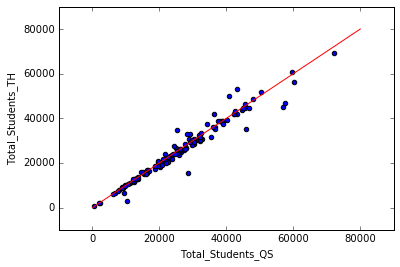

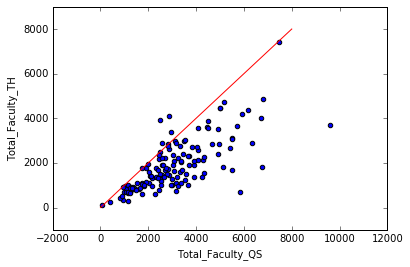

In [23]:
# We drop the row in the merged dataframe where there are some unknows datas
merged_frame = merged_frame[merged_frame.Total_Students_QS != 'Unknown']

#We plot the number of Students for everey Universities between QS and TH website
# We also plot a red line regression 

students = merged_frame.plot(kind='scatter', x = 'Total_Students_QS',y = 'Total_Students_TH')
x = np.linspace(0, 80000, 80000)
plt.plot(x,x,c='r')
plt.show(students)

Faculty = merged_frame.plot(kind='scatter', x = 'Total_Faculty_QS',y = 'Total_Faculty_TH')
x = np.linspace(0, 8000, 8000)
plt.plot(x,x,c='r')
plt.show(students)


We plotted 2 things.

First a plot with the Total number of students from one website on one axis and from the other website on the other axis.
Secondly on the same plot we put a red line: the linear function which is the line where all the datas should be if the datas from both websites were the same.
We Repeated this operation for the Total number of Students and for the number of faculty members.

For The first plot we observe that there is a strong correlation and the datas are approximatly the same.

For the second plot we clearly see that the number of faculty member from the QS website is way ABOVE the number from the other website.

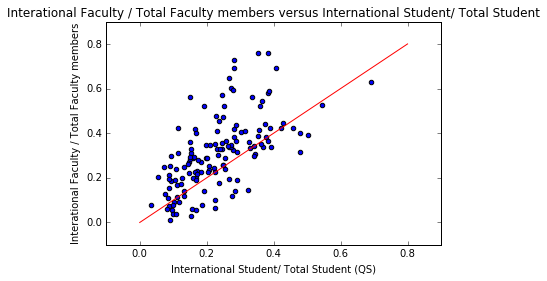

In [24]:
merged_frame['International_Students_mean'] = np.mean([merged_frame.Inter_Students_QS,merged_frame.Inter_Students_TH],axis=0)
merged_frame['Total_Students_mean'] = np.mean([merged_frame.Total_Students_QS,merged_frame.Total_Students_TH],axis=0)
merged_frame['Total_Faculty_mean'] = np.mean([merged_frame.Total_Faculty_QS,merged_frame.Total_Faculty_TH],axis=0)

x = merged_frame['Inter_Students_QS'].div(merged_frame['Total_Students_QS'])
y = merged_frame.Inter_Faculty.div(merged_frame['Total_Faculty_QS'])  
                                                
#Inter = merged_frame.plot(kind='scatter', x  ,y )
plt.scatter(x,y)
plt.title('Interational Faculty / Total Faculty members versus International Student/ Total Student')
plt.xlabel('International Student/ Total Student (QS)')
plt.ylabel('Interational Faculty / Total Faculty members')
line = np.linspace(0, 0.8, 1000)
plt.plot(line,line,c='r')
plt.show()

observation : It is possible that there is a positive correlation bewtween international faculty members and universities with high ratio of International Students. 

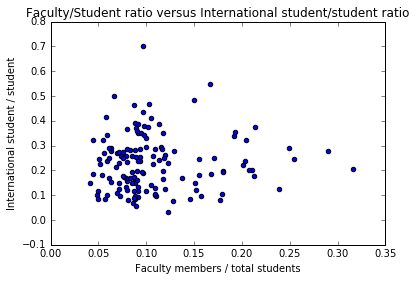

In [25]:
x = merged_frame.Total_Faculty_mean.div(merged_frame.Total_Students_mean)
y = merged_frame.International_Students_mean.div(merged_frame.Total_Students_mean)  
                                                
#Inter = merged_frame.plot(kind='scatter', x  ,y )
plt.scatter(x,y)
plt.title('Faculty/Student ratio versus International student/student ratio')
plt.xlabel('Faculty members / total students')
plt.ylabel('International student / student')
plt.show()

observation: These results are inconclusive. We do not observe a clear pattern between both ratios. It don't not seem to have a linear correlation between faculty members and international students. It might be that we have a negative correlation but cannot conclude this from this graph.


### QUESTION 5

In order to establish which university is the best, we consider the scores in the different categories that were given in the rankings.
The QS ranking has the following items (they will be named QS(number) afterwards):
    1 - Overall
    2 - Academic reputation
    3 - Citation per faculty
    4 - Employer reputation
    5 - Faculty Student
    6 - International Students
    7 - International faculty
    
The Times higher ranking has (they will be named TH(number) afterwards):
    1 - Overall 
    2 - Teaching
    3 - Research
    4 - Citation
    5 - Industry income
    6 - International outlook

In order to be able to make a scoring system that considers both rankings, we made the following assumptions:
     - QS(1) & TH(1) are removed because we want to make another overall ranking, it would make no sense to take them into account. 
     - The average between TH(2) and TH(3) will correspond to QS(2) because to us, teaching and research put together are academic reputation.
     - QS(3) = TH(4)
     - QS(5) correspond to the Faculty/Student ratio that we computed in question 2.
     - QS(4) and TH(5) will be removed because they don't have an equivalent in the other ranking.
     - QS(6) and QS(7) are forming TH(6) because the international students and faculty are both parts of the international outlook.
     
In the end, our criterias are:
    1 - Academic 
    2 - Citations
    3 - Faculty over student ratio
    4 - International outlook

When looking at the merged rankings, one can notice that in the top 10, apart from number 7 (which is UCL for the QS and Princeton University for Times Higher), both ranking share the same universities at the top even though they are not in the same order. It seemed highly unlikely that a university whihch is not in the top 10 of both ranking could in the end be the best universy when merging. This is why we removed the two number 7 and decided to work with only 9 universities.


In [26]:
#Remove the number 7 and work with the rest. Puting the Scores in a DataFrame.
THscores = pd.DataFrame()
#Extracting the Data from TH5. In order to handle a small amount of data we will use only the first 10 universities.
TH5 = TH5.head(10)
THscores['Name' ] = TH5.aliases

#Taking the average between TH(2) and TH(3):
THscores['Academic_Reputation'] = (pd.to_numeric(TH5.scores_teaching, errors='coerce') +
                        pd.to_numeric(TH5.scores_research, errors='coerce')).div(2)
THscores['Citations'] = pd.to_numeric(TH5.scores_citations, errors='coerce')
#THscores['Faculty_over_Student'] = THframe['Faculty_over_Students']
THscores['International_Outlook'] = pd.to_numeric(TH5.scores_international_outlook, errors='coerce')

#We reset the index of the THframe and then we use it to have the Faculty over student ratio.

THscores['Faculty_over_Students'] = TH['Total_Faculty'].head(10).div(TH['Total_Students'].head(10))


display(THscores)

,Name,Academic_Reputation,Citations,International_Outlook,Faculty_over_Students
0,University of Oxford,93.1,99.1,95.0,0.089274
1,University of Cambridge,92.8,97.5,93.0,0.091740
2,California Institute of Technology caltech,93.9,99.5,59.7,0.153916
3,Stanford University,92.9,99.9,77.6,0.133354
4,Massachusetts Institute of Technology,89.6,100.0,87.6,0.114968
5,Harvard University,91.3,99.7,79.7,0.112368
6,Princeton University,89.8,99.6,78.7,0.120427
7,Imperial College London,85.2,96.7,96.6,0.087722
8,University of Chicago,87.7,99.4,69.6,0.161257
9,ETH Zurich – Swiss Federal Institute of Techno...,84.2,94.3,98.1,0.068476


In order to have the same standards, we create a function to normalize scoring values. We will set the maximum of each column at 100 and and then set the other values taking this into account.

In [27]:
def Normalizing(ScoreFrame,Column):
    MaxValue = max(ScoreFrame[Column])
    ScoreFrame[Column] = (ScoreFrame[Column] * 100) / MaxValue
    return ScoreFrame

In [28]:
THscores = Normalizing(THscores, 'Academic_Reputation')
THscores = Normalizing(THscores, 'Faculty_over_Students')
THscores = Normalizing(THscores, 'International_Outlook')

display(THscores)

,Name,Academic_Reputation,Citations,International_Outlook,Faculty_over_Students
0,University of Oxford,99.148030,99.1,96.839959,55.361552
1,University of Cambridge,98.828541,97.5,94.801223,56.890346
2,California Institute of Technology caltech,100.000000,99.5,60.856269,95.447555
3,Stanford University,98.935037,99.9,79.102956,82.696830
4,Massachusetts Institute of Technology,95.420660,100.0,89.296636,71.295068
5,Harvard University,97.231097,99.7,81.243629,69.682831
6,Princeton University,95.633653,99.6,80.224261,74.680451
7,Imperial College London,90.734824,96.7,98.470948,54.398599
8,University of Chicago,93.397231,99.4,70.948012,100.000000
9,ETH Zurich – Swiss Federal Institute of Techno...,89.669862,94.3,100.000000,42.463946


In [29]:
THscores = THscores.drop(6)
THscores = THscores.set_index('Name')

In [30]:
display(THscores)

,Academic_Reputation,Citations,International_Outlook,Faculty_over_Students
Name,,,,
University of Oxford,99.148030,99.1,96.839959,55.361552
University of Cambridge,98.828541,97.5,94.801223,56.890346
California Institute of Technology caltech,100.000000,99.5,60.856269,95.447555
Stanford University,98.935037,99.9,79.102956,82.696830
Massachusetts Institute of Technology,95.420660,100.0,89.296636,71.295068
Harvard University,97.231097,99.7,81.243629,69.682831
Imperial College London,90.734824,96.7,98.470948,54.398599
University of Chicago,93.397231,99.4,70.948012,100.000000
ETH Zurich – Swiss Federal Institute of Technology Zurich,89.669862,94.3,100.000000,42.463946


We believe that the international dimension is less important for a university to be the best. It still matters, however we think that teaching, citations and faculty over student ratio is more important than the rest. This is why every other item apart from the international dimension is given a 2 factor in our grading system.

In [31]:
def Grade(Score):
    Score['Grade'] = (2*Score['Academic_Reputation'] + 2*Score['Citations'] + Score['International_Outlook'] + 
                      2*Score['Faculty_over_Students'])/7
    return Score

In [32]:
THscores = Grade(THscores)
display(THscores.sort_values('Grade', ascending=False))

,Academic_Reputation,Citations,International_Outlook,Faculty_over_Students,Grade
Name,,,,,
University of Chicago,93.397231,99.4,70.948012,100.000000,93.791782
California Institute of Technology caltech,100.000000,99.5,60.856269,95.447555,92.964483
Stanford University,98.935037,99.9,79.102956,82.696830,91.738099
Massachusetts Institute of Technology,95.420660,100.0,89.296636,71.295068,88.961156
Harvard University,97.231097,99.7,81.243629,69.682831,87.781641
University of Oxford,99.148030,99.1,96.839959,55.361552,86.294160
University of Cambridge,98.828541,97.5,94.801223,56.890346,85.891285
Imperial College London,90.734824,96.7,98.470948,54.398599,83.162542
ETH Zurich – Swiss Federal Institute of Technology Zurich,89.669862,94.3,100.000000,42.463946,78.981088


Let's work with QS now, we will use a similar function as the Get_data function in question 1, but extracting only the items we need for the score.

In [33]:
def Get_score_data(HTML):
#Using BeautifulSoup to extract the data from the given HTML
    Page_Soup = BeautifulSoup(requests.get(HTML).text, 'html.parser')
    name = Page_Soup.find('h1').text
   
    #We get the number, delete the comma and then the rest of the text (there was spaces and text we had no use of)
    
    Array =  re.findall(r'[+-]?[0-9.]+', Page_Soup.find('ul', class_='score').text)
    
    Score = pd.DataFrame({'Name': [name], 'Academic_Reputation': Array[1], 'Citation_per_Faculty': Array[2], 
                         'Inter_Faculty': Array[5], 'InterStudents': Array[6]})
    return Score

In [34]:
#Using the same process as in question 1, but with a different function
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508507889334')
req = r.json()
data = req['data']
QSframe = pd.DataFrame.from_dict(data)
QSframe.url = "https://www.topuniversities.com" + QSframe.url

QS = QSframe.head(10)
QSscores = pd.DataFrame()
for i,url in enumerate(QS.url):
    QSscores = QSscores.append(Get_score_data(url))

In [35]:
#Reindexing and getting rid of the data we do not want to work with.
QSscores = QSscores.set_index('Name')
QSscores = QSscores.drop('UCL (University College London)')

In [36]:
display(QSscores)

,Academic_Reputation,Citation_per_Faculty,InterStudents,Inter_Faculty
Name,,,,
Massachusetts Institute of Technology (MIT),100,99.9,96.1,100
Stanford University,100,99.4,72.7,99.6
Harvard University,100,99.9,75.2,96.5
California Institute of Technology (Caltech),99.5,100,89.2,93.4
University of Cambridge,100,78.3,97.7,97.4
University of Oxford,100,76.3,98.5,98.6
Imperial College London,99.4,68.7,100,100
University of Chicago,99.9,85.9,79.8,71.9
ETH Zurich - Swiss Federal Institute of Technology,99.6,98.7,98.8,100


In [ ]:
QSscores['International_Outlook'] = (pd.to_numeric(QSscores['InterStudents']) + pd.to_numeric(QSscores['Inter_Faculty']))/2
QSscores['Citations'] = pd.to_numeric(QSscores['Citation_per_Faculty'])
QSscores['Academic_Reputation'] = pd.to_numeric(QSscores['Academic_Reputation'])


#We reset the index of the QS and then we use it to have the Faculty over student ratio.
QS = QSdf
QS = QS.reset_index()
QS = QS.sort_values('Rank')

#Creating an empty column to contain the results:
QSscores['Faculty_over_Students'] = 'NaN'

i = 0
while i < len(QSscores['Academic_Reputation']) :
    
    QSscores['Faculty_over_Students'][i] = QS['Total_Faculty'][i]/QS['Total_Students'][i]
    i+=1

In [38]:
display(QSscores)

,Academic_Reputation,Citation_per_Faculty,InterStudents,Inter_Faculty,International_Outlook,Citations,Faculty_over_Students
Name,,,,,,,
Massachusetts Institute of Technology (MIT),100.0,99.9,96.1,100,98.05,99.9,0.26945
Stanford University,100.0,99.4,72.7,99.6,86.15,99.4,0.26987
Harvard University,100.0,99.9,75.2,96.5,85.85,99.9,0.193945
California Institute of Technology (Caltech),99.5,100,89.2,93.4,91.30,100.0,0.422616
University of Cambridge,100.0,78.3,97.7,97.4,97.55,78.3,0.292488
University of Oxford,100.0,76.3,98.5,98.6,98.55,76.3,0.342292
Imperial College London,99.4,68.7,100,100,100.00,68.7,0.204151
University of Chicago,99.9,85.9,79.8,71.9,75.85,85.9,0.244251
ETH Zurich - Swiss Federal Institute of Technology,99.6,98.7,98.8,100,99.40,98.7,0.180645


In [39]:
#Deleting the columsn that are now in two.
QSscores = QSscores.drop(['Citation_per_Faculty', 'InterStudents' ,'Inter_Faculty'] ,axis=1)

    One can notice that the "Citations" and "Faculty over Students" columns aren't normalized.

In [40]:
QSscores = Normalizing(QSscores, 'Citations')
QSscores = Normalizing(QSscores, 'Faculty_over_Students')
#We now get the grade
QSscores =Grade(QSscores)

#In order to find the best university, we put the in the same order inside the 2 dataframes.
#To do so we make sure that their names are the same.

QSscores = QSscores.rename(index={'Massachusetts Institute of Technology (MIT) ':'Massachusetts Institute of Technology',
                                 'California Institute of Technology (Caltech)' : 'California Institute of Technology caltech',
                                 'ETH Zurich - Swiss Federal Institute of Technology' :'ETH Zurich – Swiss Federal Institute of Technology Zurich'})


Now that we have the both rankings with the same universities, we are able to make the average of the the two grades. To do so we sort the indexes and then obtain a final DataFrame.

In [41]:
THscores = THscores.sort_index()
QSscores = QSscores.sort_index()
display(QSscores)
display(THscores)

,Academic_Reputation,International_Outlook,Citations,Faculty_over_Students,Grade
Name,,,,,
California Institute of Technology caltech,99.5,91.30,100.0,100,98.6143
ETH Zurich – Swiss Federal Institute of Technology Zurich,99.6,99.40,98.7,42.7444,83.0698
Harvard University,100.0,85.85,99.9,45.8916,82.4905
Imperial College London,99.4,100.00,68.7,48.3064,76.1161
Massachusetts Institute of Technology,100.0,98.05,99.9,63.7575,89.3379
Stanford University,100.0,86.15,99.4,63.857,87.5234
University of Cambridge,100.0,97.55,78.3,69.2089,84.6525
University of Chicago,99.9,75.85,85.9,57.795,80.4343
University of Oxford,100.0,98.55,76.3,80.9936,87.591


,Academic_Reputation,Citations,International_Outlook,Faculty_over_Students,Grade
Name,,,,,
California Institute of Technology caltech,100.000000,99.5,60.856269,95.447555,92.964483
ETH Zurich – Swiss Federal Institute of Technology Zurich,89.669862,94.3,100.000000,42.463946,78.981088
Harvard University,97.231097,99.7,81.243629,69.682831,87.781641
Imperial College London,90.734824,96.7,98.470948,54.398599,83.162542
Massachusetts Institute of Technology,95.420660,100.0,89.296636,71.295068,88.961156
Stanford University,98.935037,99.9,79.102956,82.696830,91.738099
University of Cambridge,98.828541,97.5,94.801223,56.890346,85.891285
University of Chicago,93.397231,99.4,70.948012,100.000000,93.791782
University of Oxford,99.148030,99.1,96.839959,55.361552,86.294160


In [42]:
FinalGrading = pd.DataFrame()
FinalGrading['Overall_Score'] = (THscores['Grade'] + QSscores['Grade'])/2

FinalGrading = FinalGrading.sort_values('Overall_Score', ascending=False)

In [43]:
display(FinalGrading)

,Overall_Score
Name,
California Institute of Technology caltech,95.7894
Stanford University,89.6308
Massachusetts Institute of Technology,89.1495
University of Chicago,87.113
University of Oxford,86.9426
University of Cambridge,85.2719
Harvard University,85.136
ETH Zurich – Swiss Federal Institute of Technology Zurich,81.0255
Imperial College London,79.6393


With respect to our ranking system merging the two previous ones, CalTech arrives first, which not that surprising because it is well ranked in both QS and TH. The weight we applied to each parameters should not be that far from the ones that were used by the ranking sites because our results are quite clear. 